In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [274]:
df=pd.read_csv("shankar_nagar.csv")
df.head()

,date,population
0,15-02-2022,9
1,15-04-2022,11
2,25-07-2022,15
3,26-10-2022,16
4,27-11-2022,13


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        7 non-null      object
 1   population  7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [276]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [277]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-277-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [278]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [279]:
 from prophet import Prophet

In [280]:
population=df.groupby('date')['population'].sum().reset_index()

In [281]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [284]:
model=Prophet(interval_width=0.95)

In [285]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/qfpkscxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/kbpldxm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71620', 'data', 'file=/tmp/tmpqki2d_87/qfpkscxh.json', 'init=/tmp/tmpqki2d_87/kbpldxm4.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelfrv816dp/prophet_model-20230421064714.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:47:14 - cmdstanpy - INFO - Chain [1] start processing
INF

In [286]:
future_dates=model.make_future_dataframe(periods=30)

In [287]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-15  10.814096    7.265223   14.679479    10.814096    10.814096   
1  2022-04-15  11.382076    7.803382   15.275183    11.382076    11.382076   
2  2022-07-25  12.354381    8.868461   15.892595    12.354381    12.354381   
3  2022-10-26  13.249671    9.578307   16.687133    13.249671    13.249671   
4  2022-11-27  13.557727    9.999897   17.134361    13.557727    13.557727   
5  2023-02-01  14.193092   10.641211   17.659563    14.193092    14.193092   
6  2023-02-27  14.443388   10.504422   17.930851    14.443388    14.443388   
7  2023-02-28  14.453015   11.065767   17.895654    14.453015    14.453015   
8  2023-03-01  14.462641   10.914927   17.983756    14.462641    14.462641   
9  2023-03-02  14.472268   10.643060   17.741498    14.472268    14.472268   
10 2023-03-03  14.481895   11.150254   18.020624    14.481895    14.481895   
11 2023-03-04  14.491522   10.858611   18.077613    14.491522   

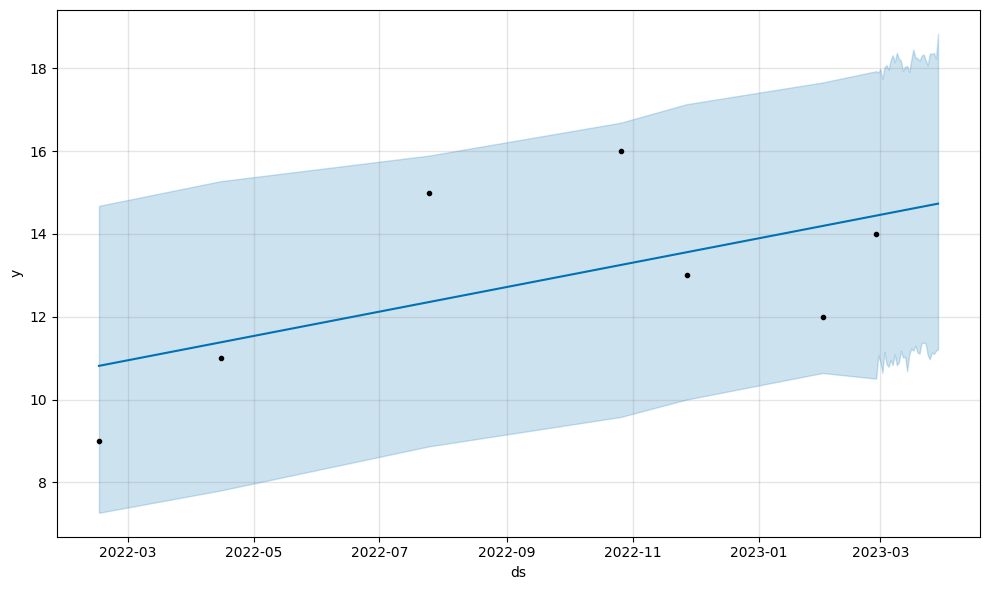

In [288]:
model.plot(forecast)
print(forecast)

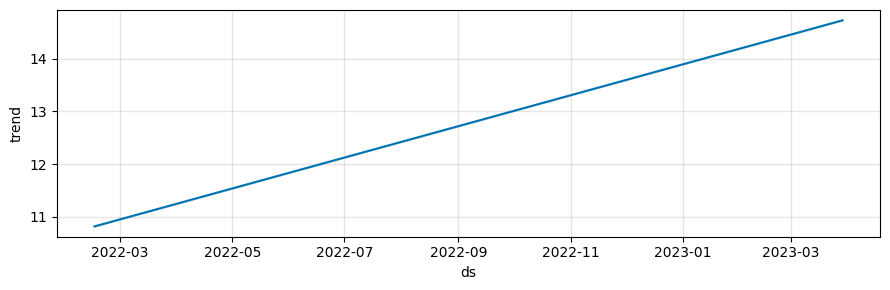

In [289]:
component=model.plot_components(forecast)

In [292]:
 model1=Prophet(interval_width=0.95)

In [293]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/hm0gzbkl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/9v4a4f69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11691', 'data', 'file=/tmp/tmpqki2d_87/hm0gzbkl.json', 'init=/tmp/tmpqki2d_87/9v4a4f69.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelo8vt8s_i/prophet_model-20230421064943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:49:43 - cmdstanpy - INFO - Chain [1] start processing
INF

In [294]:
future_dates=model1.make_future_dataframe(periods=10)

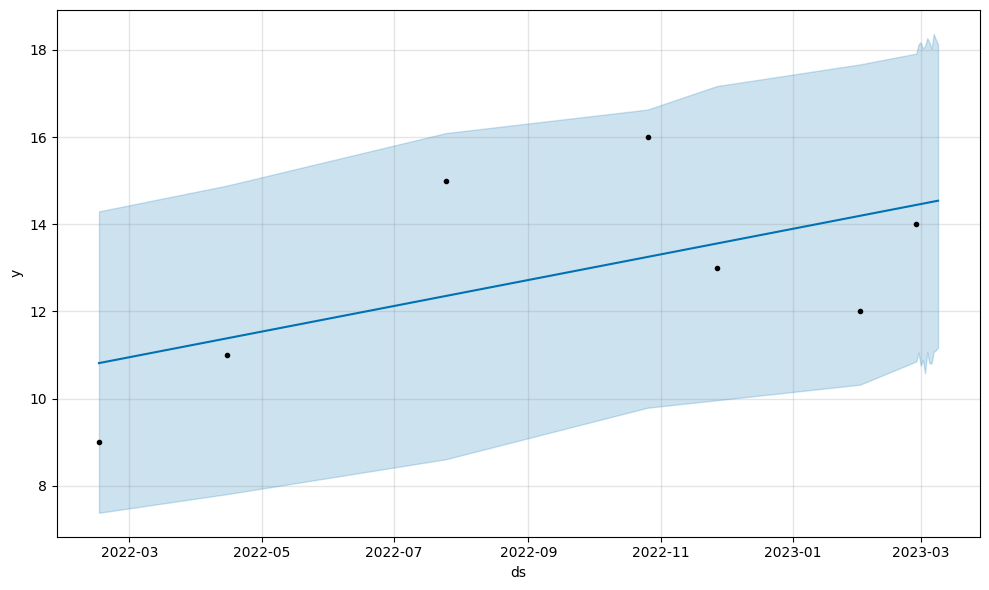

In [295]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-15  10.814096    7.380269   14.295323    10.814096    10.814096   
1  2022-04-15  11.382076    7.807757   14.886349    11.382076    11.382076   
2  2022-07-25  12.354381    8.608370   16.090965    12.354381    12.354381   
3  2022-10-26  13.249671    9.790303   16.630756    13.249671    13.249671   
4  2022-11-27  13.557727    9.962539   17.170007    13.557727    13.557727   
5  2023-02-01  14.193092   10.318624   17.666686    14.193092    14.193092   
6  2023-02-27  14.443388   10.852939   17.915149    14.443388    14.443388   
7  2023-02-28  14.453015   11.053699   18.132245    14.453015    14.453015   
8  2023-03-01  14.462641   10.753818   18.172661    14.462641    14.462641   
9  2023-03-02  14.472268   10.890167   18.030450    14.472268    14.472268   
10 2023-03-03  14.481895   10.574911   18.090233    14.481895    14.481895   
11 2023-03-04  14.491522   11.065013   18.267715    14.491522   

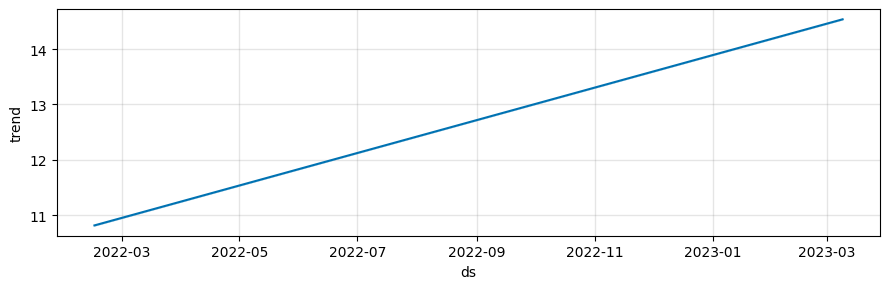

In [296]:
week=model1.plot_components(forecasting)
print(forecasting)